In [1]:
#I certify that the code and data in this assignment were generated independently, using only the tools and resources defined in the course and that I did not receive any external help, coaching or contributions during the production of this work
!pip install gym

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from gym import spaces
from google.colab import widgets
import time

In [3]:
class StoGridEnvironment(gym.Env):            # stochastic enviroment
    metadata = { 'render.modes': [] }
    
    def __init__(self):
        self.observation_space = spaces.Discrete(16)  #12
        self.action_space = spaces.Discrete(4)   #4
        self.max_timesteps = 25   #10

    def reset(self):
        self.timestep = 0
        self.reward=0
        self.agent_pos = [0, 0]
        self.goal_pos = [3, 3]
        self.r1=[0,2]
        self.r2=[1,1]
        self.r3=[1,3]
        self.r4=[3,0]
        self.state = np.zeros((4,4))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.75
        self.state[tuple(self.r1)] = 0.5
        self.state[tuple(self.r2)] = 0.25
        self.state[tuple(self.r3)] = 0.5
        self.state[tuple(self.r4)] = 0.5
        observation = self.state.flatten()
        return observation
    
    def step(self, action):
        self.state = np.random.choice(self.observation_space.n)
        a=[+1,-1]
        if action == 0:  #Down (95% down, 5% up)
          self.agent_pos[0] = self.agent_pos[0] +np.random.choice(a,p=[0.95,0.05])
          #print('Down')
        if action == 1:  #Up  (95% up, 5% down)
          self.agent_pos[0]= self.agent_pos[0] -np.random.choice(a,p=[0.95,0.05])
          #print('Up')
        if action == 2:  #Right (95% right, 5% left)
          self.agent_pos[1] = self.agent_pos[1] +np.random.choice(a,p=[0.95,0.05])
          #print('Right')
        if action == 3:  #Left (95% left, 5% right)
          self.agent_pos[1] = self.agent_pos[1] -np.random.choice(a,p=[0.95,0.05])
          #print('left')
          
        self.agent_pos = np.clip(self.agent_pos, 0, 3)
        self.state = np.zeros((4,4))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.75
        self.state[tuple(self.r1)] = 0.5
        self.state[tuple(self.r2)] = 0.25
        self.state[tuple(self.r3)] = 0.5
        self.state[tuple(self.r4)] = 0.5
        observation = self.state.flatten()
        
        
        if (self.agent_pos == self.goal_pos).all():
          self.reward += 100
          print('Goal Reached: +100')
        elif (self.agent_pos == self.r1).all():
          self.reward +=1
          print('Got a gold: +1')
        elif (self.agent_pos == self.r2).all():
          self.reward -=2
          print('Bandits: -2')
        elif (self.agent_pos == self.r3).all():
          self.reward +=1
          print('Got a gold: +1')
        elif (self.agent_pos == self.r4).all():
          self.reward +=1
          print('Got a gold: +1')   

        
        self.timestep += 1
        if self.timestep >= self.max_timesteps:
          done = True
        elif (self.agent_pos == self.goal_pos).all():
          done = True
        else:
          done = False 
        info = {}
        
        return observation, self.reward, done, info

    def render(self):
        plt.imshow(self.state)

In [4]:
class RandomAgent:
  def __init__(self, env):
    self.env = env
    self.observation_space = env.observation_space
    self.action_space = env.action_space

  def step(self, observation):
    return np.random.choice(self.action_space.n)

""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Bandits: -2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Bandits: -2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Bandits: -2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Got a gold: +1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Got a gold: +1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

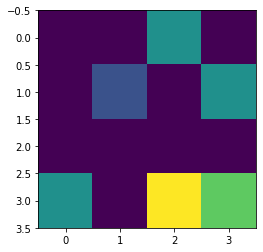

<IPython.core.display.Javascript object>

Total reward: -4


In [ ]:
env = StoGridEnvironment()
agent = RandomAgent(env)

obs = env.reset()
done = False

output_grid = widgets.Grid(1, 1)
with output_grid.output_to(0, 0):
  env.render()


while not done:
  action = agent.step(obs)
  obs, reward, done, info = env.step(action)
  with output_grid.output_to(0, 0):
    output_grid.clear_cell()
    env.render()
  time.sleep(1)
print('Total reward:', env.reward)

In [5]:
class q_learning:

  def __init__(self):
    self.env = StoGridEnvironment()
    self.env.reset()
    self.agent = RandomAgent(self.env)
    self.q_values=np.zeros((16,4))
    self.totalreward=[]
    self.stepstaken=[]
    self.epsilondecay=[]
    self.epsilon=1
    self.lr=0.2
    self.df=0.9
    self.decay=0.9954

  def reset(self):
    self.env.agent_pos=[0,0]
    self.env.timestep=0
    self.done1=False
    self.action=0
    self.state=0
    self.reward=0   
    self.stepno=0
    self.rewardsum=0

  def action1(self,state1,epsilon):
    if np.random.rand()>epsilon:
      return np.argmax(self.q_values[state1])
    else:
      return np.random.randint(4)
  
  def takeaction(self,action):
    a=[+1,-1]
    if action == 0:  #Down (95% down, 5% up)
        self.env.agent_pos[0] = self.env.agent_pos[0] +np.random.choice(a,p=[0.95,0.05])
          #print('Down')
    if action == 1:  #Up  (95% up, 5% down)
        self.env.agent_pos[0]= self.env.agent_pos[0] -np.random.choice(a,p=[0.95,0.05])
          #print('Up')
    if action == 2:  #Right (95% right, 5% left)
        self.env.agent_pos[1] = self.env.agent_pos[1] +np.random.choice(a,p=[0.95,0.05])
          #print('Right')
    if action == 3:  #Left (95% left, 5% right)
        self.env.agent_pos[1] = self.env.agent_pos[1] -np.random.choice(a,p=[0.95,0.05])
          #print('left')

    self.env.agent_pos = np.clip(self.env.agent_pos, 0, 3)
    
    if (self.env.agent_pos == self.env.goal_pos).all():
        self.reward = 100
    elif (self.env.agent_pos == self.env.r1).all():
        self.reward =1
    elif (self.env.agent_pos == self.env.r2).all():
        self.reward =-2 
    elif (self.env.agent_pos == self.env.r3).all():
        self.reward =1
    elif (self.env.agent_pos == self.env.r4).all():
        self.reward =1
    else:
        self.reward = 0

    self.env.timestep+=1
    self.stepno+=1

    return(self.env.agent_pos,self.reward)
  
  def training(self):
    for episode in range(1000):
      self.reset()
      while not self.done1:
        self.q_values[15]=0
        action=self.action1(self.state,self.epsilon)
        
        self.env.agent_pos, reward = self.takeaction(action)
        newstate=4*self.env.agent_pos[0]+self.env.agent_pos[1]  #state update
        
        self.q_values[self.state,action]=self.q_values[self.state,action] + self.lr*(reward+self.df*np.max(self.q_values[newstate])-self.q_values[self.state,action])
        self.state=newstate

        self.rewardsum+=reward

        
        
        if self.env.timestep >= self.env.max_timesteps:
          self.done1 = True
        elif (self.env.agent_pos == self.env.goal_pos).all():
          self.done1 = True

      self.stepstaken.append(self.stepno)
      self.totalreward.append(self.rewardsum)
      self.epsilondecay.append(self.epsilon)
      self.epsilon*=self.decay
      
  def evaluation(self):
    self.stepstaken=[]
    self.totalreward=[]
    for episode in range(10):
      self.reset()
      while not self.done1:
        self.q_values[15]=0
        action=self.action1(self.state,self.epsilon)
        
        self.env.agent_pos, reward = self.takeaction(action)
        newstate=4*self.env.agent_pos[0]+self.env.agent_pos[1]  #state update
        
        self.q_values[self.state,action]=self.q_values[self.state,action] + self.lr*(reward+self.df*np.max(self.q_values[newstate])-self.q_values[self.state,action])
        self.state=newstate

        self.rewardsum+=reward

        
        
        if self.env.timestep >= self.env.max_timesteps:
          self.done1 = True
        elif (self.env.agent_pos == self.env.goal_pos).all():
          self.done1 = True

      self.stepstaken.append(self.stepno)
      self.totalreward.append(self.rewardsum)
      

In [6]:
class sarsa:

  def __init__(self):
    self.env = StoGridEnvironment()
    self.env.reset()
    self.agent = RandomAgent(self.env)
    self.q_values=np.zeros((16,4))
    self.totalreward=[]
    self.stepstaken=[]
    self.epsilon=1
    self.lr=0.2
    self.df=0.9
    self.decay=0.9954
    self.epsilondecay=[]

  def reset(self):
    self.env.agent_pos=[0,0]
    self.env.timestep=0
    self.done1=False
    self.action=0
    self.state=0
    self.reward=0   
    self.stepno=0
    self.rewardsum=0

  def action1(self,state1,epsilon):
    if np.random.rand()>epsilon:
      return np.argmax(self.q_values[state1])
    else:
      return np.random.randint(4)
  
  def takeaction(self,action):
    a=[+1,-1]
    if action == 0:  #Down (95% down, 5% up)
        self.env.agent_pos[0] = self.env.agent_pos[0] +np.random.choice(a,p=[0.95,0.05])
          #print('Down')
    if action == 1:  #Up  (95% up, 5% down)
        self.env.agent_pos[0]= self.env.agent_pos[0] -np.random.choice(a,p=[0.95,0.05])
          #print('Up')
    if action == 2:  #Right (95% right, 5% left)
        self.env.agent_pos[1] = self.env.agent_pos[1] +np.random.choice(a,p=[0.95,0.05])
          #print('Right')
    if action == 3:  #Left (95% left, 5% right)
        self.env.agent_pos[1] = self.env.agent_pos[1] -np.random.choice(a,p=[0.95,0.05])
          #print('left')

    self.env.agent_pos = np.clip(self.env.agent_pos, 0, 3)
    
    if (self.env.agent_pos == self.env.goal_pos).all():
        self.reward = 100
    elif (self.env.agent_pos == self.env.r1).all():
        self.reward =1
    elif (self.env.agent_pos == self.env.r2).all():
        self.reward =-2 
    elif (self.env.agent_pos == self.env.r3).all():
        self.reward =1
    elif (self.env.agent_pos == self.env.r4).all():
        self.reward =1
    else:
        self.reward = 0

    self.env.timestep+=1
    self.stepno+=1

    return(self.env.agent_pos,self.reward)
  
  def training(self):
    for episode in range(1000):
      self.reset()
      action=self.action1(self.state,self.epsilon)
      while not self.done1:
        self.q_values[15]=0
        
        self.env.agent_pos, reward = self.takeaction(action)
        newstate=4*self.env.agent_pos[0]+self.env.agent_pos[1]  #state update
        
        nextaction=self.action1(newstate,self.epsilon)
        self.q_values[self.state,action]=self.q_values[self.state,action] + self.lr*(reward+self.df*self.q_values[newstate,nextaction]-self.q_values[self.state,action])
        self.state=newstate
        action=nextaction
        self.rewardsum+=reward

        if self.env.timestep >= self.env.max_timesteps:
          self.done1 = True
        elif (self.env.agent_pos == self.env.goal_pos).all():
          self.done1 = True

      self.stepstaken.append(self.stepno)
      self.totalreward.append(self.rewardsum)
      self.epsilondecay.append(self.epsilon)
      self.epsilon*=self.decay
      
  def evaluation(self):
    self.stepstaken=[]
    self.totalreward=[]
    for episode in range(10):
      self.reset()
      action=self.action1(self.state,self.epsilon)
      while not self.done1:
        self.q_values[15]=0
        
        self.env.agent_pos, reward = self.takeaction(action)
        newstate=4*self.env.agent_pos[0]+self.env.agent_pos[1]  #state update
        
        nextaction=self.action1(newstate,self.epsilon)
        self.q_values[self.state,action]=self.q_values[self.state,action] + self.lr*(reward+self.df*self.q_values[newstate,nextaction]-self.q_values[self.state,action])
        self.state=newstate
        action=nextaction
        self.rewardsum+=reward

        if self.env.timestep >= self.env.max_timesteps:
          self.done1 = True
        elif (self.env.agent_pos == self.env.goal_pos).all():
          self.done1 = True
      self.stepstaken.append(self.stepno)
      self.totalreward.append(self.rewardsum)

In [7]:
def QLimplemetation():
    print('Implementing Q learning:\n')
    table1=q_learning()
    table1.training()
    print('Q table values after training:')
    print(table1.q_values)

    plot1 = plt.figure(1)
    plt.xlabel('Episodes')
    plt.title('Q learning results after training for stochastic environment')
    plt.plot(table1.totalreward)
    plt.plot(table1.stepstaken)
    plt.legend(['Reward per episode','Steps per episode'],loc='best')

    plot2 = plt.figure(2)
    plt.plot(table1.epsilondecay)
    plt.xlabel('Episodes')
    plt.ylabel('Epsilon')
    
    print('Q table values after evaluation:')
    table1.evaluation()
    print(table1.q_values)

    plot3=plt.figure(3)
    plt.xlabel('Episodes')
    plt.title('Q learning results after evaluation for stochastic environment:')
    plt.plot(table1.totalreward)
    plt.plot(table1.stepstaken)
    plt.legend(['Reward per episode','Steps per episode'],loc='best')
    plt.show()

def sarsaimplementation():
  print('Implementing SARSA:\n')
  table2=sarsa()
  table2.training()
  print('Q table values after training:')
  print(table2.q_values)

  plot1=plt.figure(1)
  plt.xlabel('Episodes')
  plt.title('SARSA results after training for stochastic environment')
  plt.plot(table2.totalreward)
  plt.plot(table2.stepstaken)
  plt.legend(['Reward per episode','Steps per episode'],loc='best')

  plot2=plt.figure(2)
  plt.plot(table2.epsilondecay)
  plt.xlabel('Episodes')
  plt.ylabel('Epsilon')

  table2.evaluation()
  print('Q values after evaluation:')
  print(table2.q_values)

  plot3=plt.figure(3)
  plt.xlabel('Episodes')
  plt.title('SARSA results after evaluation for stochastic environment:')
  plt.plot(table2.totalreward)
  plt.plot(table2.stepstaken)
  plt.legend(['Reward per episode','Steps per episode'],loc='best')
  plt.show()

Implementing Q learning:

Q table values after training:
[[56.77955778 50.78178294 53.34505144 51.11015947]
 [60.46821244 52.59837739 52.39005625 47.22314585]
 [68.7072253  50.14931334 41.12187787 28.03333788]
 [73.59136695 33.53761185 17.36371976 42.55788003]
 [63.13903943 51.81887847 59.01521912 56.4093886 ]
 [62.15547633 52.89681792 70.84455208 54.64960292]
 [78.70624017 51.37779148 71.73837812 53.61764264]
 [85.53256978 52.97331251 54.4043438  45.96092266]
 [66.99105267 57.1211581  70.53415998 63.95111825]
 [74.21069258 59.59961468 79.08889543 67.11616969]
 [88.32129248 72.44144154 81.9032106  71.76933327]
 [99.66426444 78.06840758 85.7063501  80.93775761]
 [69.8383722  59.97106246 75.90684172 70.13908203]
 [78.47289345 71.27211576 85.80392456 73.43149997]
 [88.51880678 81.43447396 98.42583821 81.07925834]
 [ 0.          0.          0.          0.        ]]
Q table values after evaluation:
[[56.92619671 50.78178294 53.34505144 51.11015947]
 [60.46821244 52.59837739 52.39005625 47.2

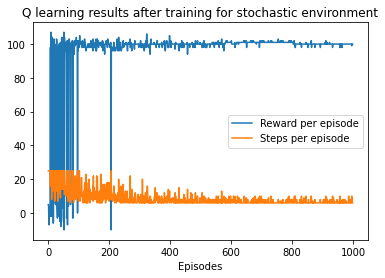

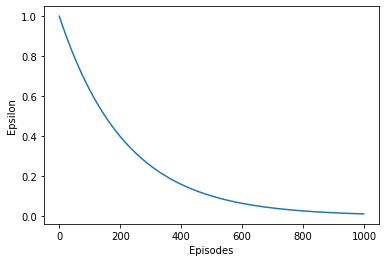

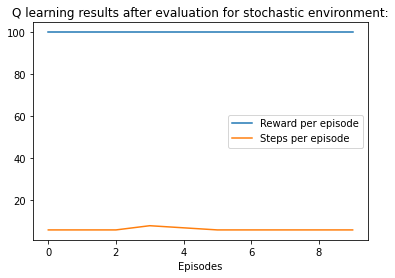

Implementing SARSA:

Q table values after training:
[[56.38088889 44.91702118 41.70300615 48.11204182]
 [15.96334208 21.75583325 47.60395809 17.1008056 ]
 [62.26246945 30.90518075 27.60342578 13.73901559]
 [40.58925959 17.67881903 13.4971869  11.85354344]
 [63.39550933 36.95992952 48.64785575 53.56049426]
 [36.14563291 22.15375154 64.80997788 23.77262135]
 [73.90345857 27.76096013 41.51568263 25.71101064]
 [65.2613406  17.07517819 44.78217646 19.44939285]
 [70.5764044  47.80008882 58.60145225 62.31007359]
 [54.26245624 22.25451888 75.36798439 42.29557088]
 [81.7324463  41.46508684 79.00400074 42.11841179]
 [99.92150037 39.46911112 71.16239875 40.56688898]
 [67.7559868  55.86648294 77.79351531 67.90135215]
 [75.06041115 65.37554195 88.31651521 64.49219423]
 [84.62126348 75.69643262 99.72966609 72.87286461]
 [ 0.          0.          0.          0.        ]]
Q values after evaluation:
[[56.08320234 44.91702118 41.70300615 48.11204182]
 [15.96334208 21.75583325 47.60395809 17.1008056 ]
 [

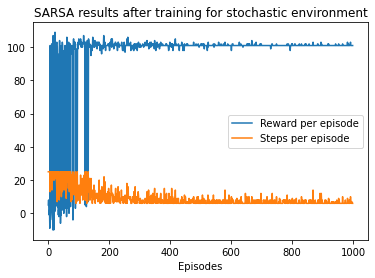

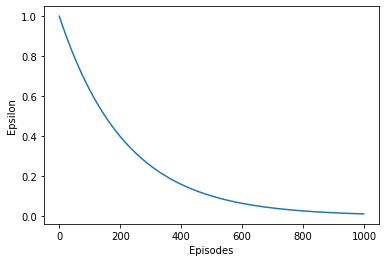

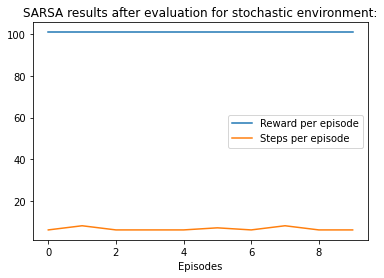

In [8]:
if __name__ == "__main__":
  QLimplemetation()
  sarsaimplementation()